<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
initial_df_shape = df.shape
initial_df_shape

(45000, 14)

In [4]:
df.nunique()

person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64

In [5]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [6]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [7]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
df[df['person_age']>100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
81,144.0,male,Bachelor,300616.0,125,RENT,4800.0,VENTURE,13.57,0.02,3.0,789,No,0
183,144.0,male,Associate,241424.0,121,MORTGAGE,6000.0,EDUCATION,11.86,0.02,2.0,807,No,0
575,123.0,female,High School,97140.0,101,RENT,20400.0,EDUCATION,10.25,0.21,3.0,805,Yes,0
747,123.0,male,Bachelor,94723.0,100,RENT,20000.0,VENTURE,11.01,0.21,4.0,714,Yes,0
32297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.00,25.0,850,No,0
37930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.00,24.0,708,No,0
38113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.00,22.0,792,No,0


<h2>EDA</h2>

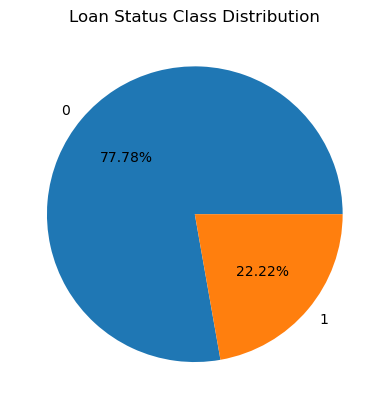

In [12]:
plt.pie(df['loan_status'].value_counts(), labels=df['loan_status'].value_counts().index, autopct='%1.2f%%')
plt.title('Loan Status Class Distribution')
plt.show();

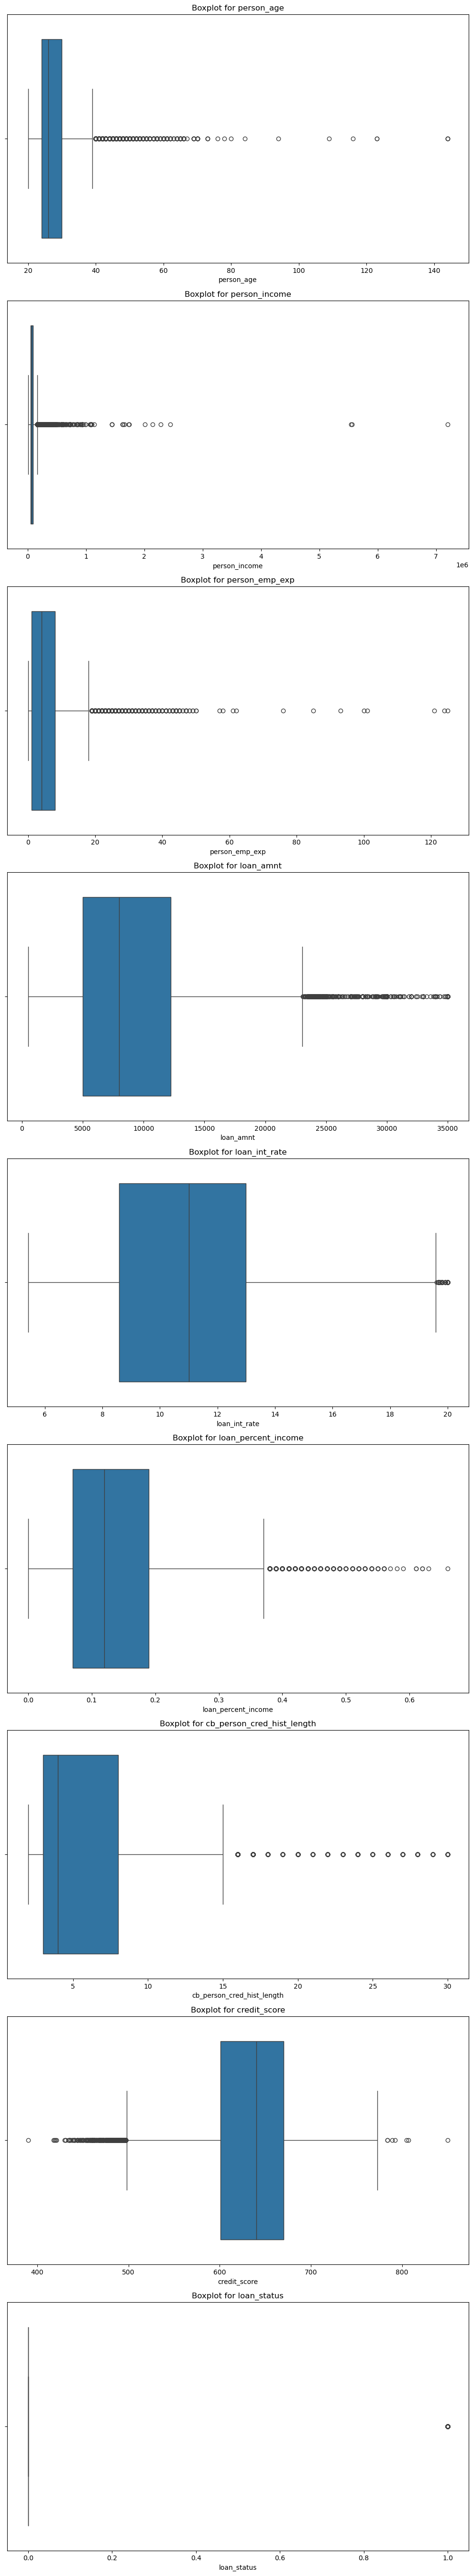

In [13]:
numerical_features = df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(10, 6 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show();

In [14]:
# Identify and drop outliers
for col_name, value in df.items():
    if np.issubdtype(value.dtype, np.number) and col_name != 'loan_status':
        Q1 = value.quantile(0.25)
        Q3 = value.quantile(0.75)
        IQR = Q3 - Q1

        # Outlier Bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify Outliers
        outliers = value[(value <= lower_bound) | (value >= upper_bound)]
        outliers_pct = np.shape(outliers)[0] * 100.0 / np.shape(df)[0]
        print(f"{col_name}: {outliers_pct:.2f}%")

        # Remove outliers
        df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

person_age: 5.73%
person_income: 5.18%
person_emp_exp: 4.23%
loan_amnt: 5.77%
loan_int_rate: 0.32%
loan_percent_income: 2.31%
cb_person_cred_hist_length: 3.56%
credit_score: 1.23%


In [15]:
df_shape_after_outlier = df.shape
df_shape_after_outlier

(37549, 14)

In [16]:
pct_outlier_remove = ((initial_df_shape[0]-df_shape_after_outlier[0])/initial_df_shape[0])*100
print(f'Percentage of outlier removed: {pct_outlier_remove: .2f}%')

Percentage of outlier removed:  16.56%


In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']))

# Concatenate with original dataset
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

# Drop original columns
df = df.drop(columns=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])

df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,21.0,12951.0,0,2500.0,7.14,0.19,2.0,532,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,21.0,12739.0,0,1600.0,14.74,0.13,3.0,640,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,21.0,13113.0,0,4500.0,8.63,0.34,2.0,651,1,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,24.0,14283.0,1,1750.0,10.99,0.12,2.0,679,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37544,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
37545,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37546,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
37547,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


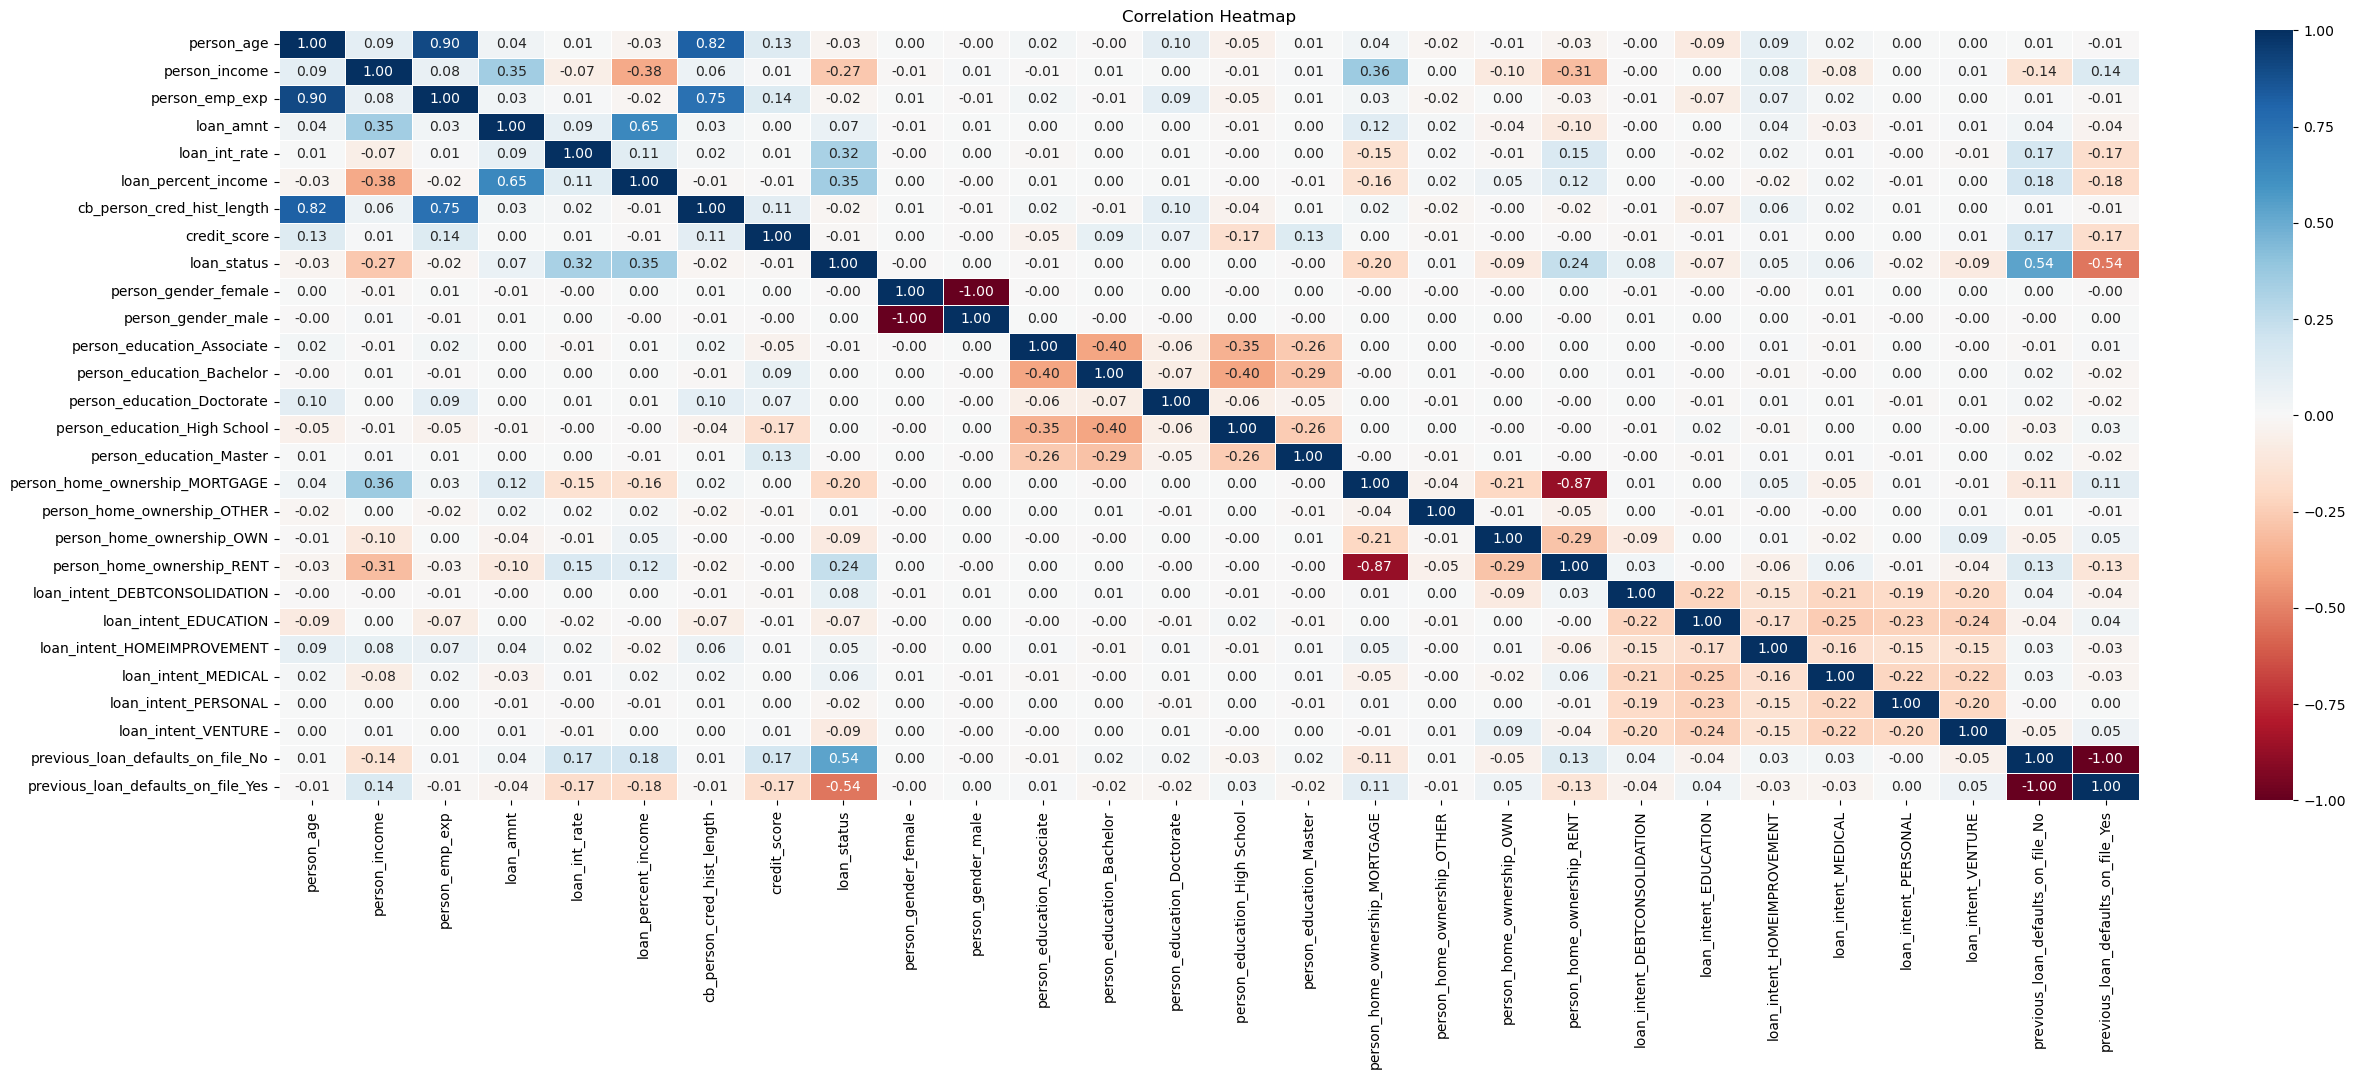

In [18]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

In [19]:
x = df.drop(['loan_status', 'person_age'],axis=1)
y = df['loan_status']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h2>Machine Learning</h2>

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(random_state=42)
ad.fit(x_train, y_train)
print('Training score:',ad.score(x_train, y_train))
print('Testing score:',ad.score(x_test,y_test))

Training score: 0.9157428676054462
Testing score: 0.9138482023968043


In [22]:
y_pred = ad.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5893
           1       0.83      0.75      0.79      1617

    accuracy                           0.91      7510
   macro avg       0.88      0.86      0.87      7510
weighted avg       0.91      0.91      0.91      7510



In [23]:
# Save the ML model
joblib.dump(ad, 'ML_model.pkl')
print("ML model saved successfully!")

ML model saved successfully!


<h2>Deep Learning</h2>

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [25]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(x_test_scaled, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8837 - loss: 0.2537 - val_accuracy: 0.9097 - val_loss: 0.1982
Epoch 2/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9135 - loss: 0.1923 - val_accuracy: 0.9057 - val_loss: 0.2032
Epoch 3/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9164 - loss: 0.1852 - val_accuracy: 0.9145 - val_loss: 0.1871
Epoch 4/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9182 - loss: 0.1805 - val_accuracy: 0.9149 - val_loss: 0.1905
Epoch 5/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9187 - loss: 0.1774 - val_accuracy: 0.9156 - val_loss: 0.1864
Epoch 6/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9188 - loss: 0.1780 - val_accuracy: 0.9133 - val_loss: 0.1888
Epoch 7/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9237 - loss: 0.1679 - val_accuracy: 0.9132 - val_loss: 0.1864
Epoch 8/50
1878/1878 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9248 - loss: 0

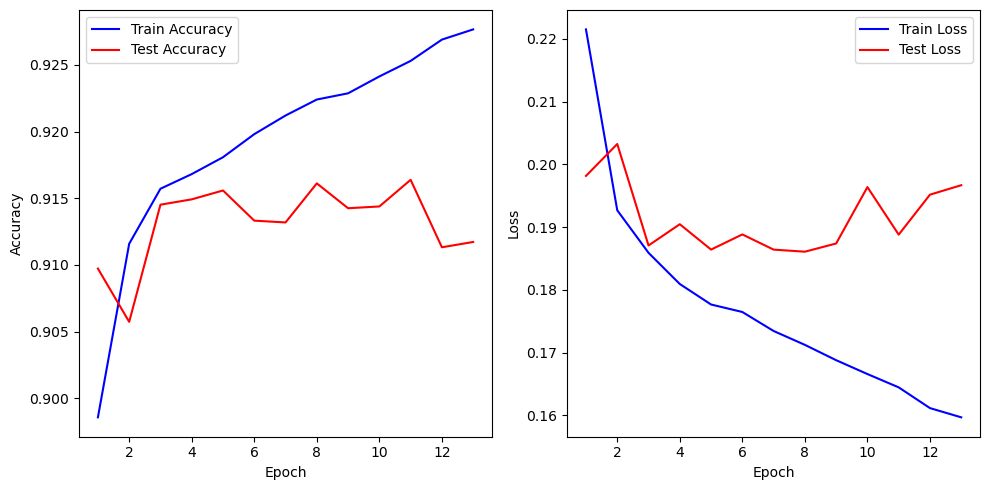

In [26]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [27]:
pred = DL_model.predict(x_test_scaled)
y_pred = (pred>0.5)
accuracy_score(y_test, y_pred)

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


0.9117177097203728

In [28]:
cr_DL = classification_report(y_test, y_pred)
print(cr_DL)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5893
           1       0.81      0.78      0.79      1617

    accuracy                           0.91      7510
   macro avg       0.87      0.86      0.87      7510
weighted avg       0.91      0.91      0.91      7510



In [29]:
# Save the DL model
DL_model.save('DL_model.keras')
print("DL model saved successfully!")

DL model saved successfully!


<h2>Machine Learning vs Deep Learning</h2>

In [30]:
# Load Models
ML_model = joblib.load('ML_model.pkl')
DL_model = load_model("DL_model.keras")

new_data = [[40000,2,5000,8,5000/40000,2,600,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0]]

ML_prediction = ML_model.predict(new_data)

new_data_scaled = sc.transform(new_data)
DL_prediction = DL_model.predict(new_data_scaled)
DL_prediction = (DL_prediction >= 0.5).astype(int)

print("ML Loan Approval Prediction:", ML_prediction)
print("DL Loan Approval Prediction:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
ML Loan Approval Prediction: [0]
DL Loan Approval Prediction: [[0]]
